In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data_frame = pd.read_csv('train.csv')
data_frame.head(5)

FileNotFoundError: ignored

In [ ]:
data_frame.shape,data_frame.dtypes

((30471, 292), id                      int64
 timestamp              object
 full_sq                 int64
 life_sq               float64
 floor                 float64
                        ...   
 mosque_count_5000       int64
 leisure_count_5000      int64
 sport_count_5000        int64
 market_count_5000       int64
 price_doc               int64
 Length: 292, dtype: object)

In [ ]:
data_frame.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

In [ ]:
data_frame.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,23783.000000,30471.000000,30471.000000,23786.000000,30471.000000,30471.000000,16030.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,...,29480.000000,29480.000000,29480.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30293.000000,30471.000000,3.047100e+04,30471.000000,3.047100e+04,30471.000000,30174.000000,30174.000000,30174.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,84056.425552,0.218922,0.118871,5140.026156,3271.272464,4.065111,5354.269699,8324.970739,4.705031,0.109678,1190.738677,1.320895,0.138295,6.635030,2.896393,0.286732,4.200978,8.253454,1.463062e+05,67207.789603,79098.662105,11178.809491,5723.853106,5455.013948,53667.908897,27253.585803,26414.414821,19209.707164,5811.618162,...,765.900619,1283.334756,1024.617808,7.274622,27.782055,30.450297,26.685078,13.320108,4.646516,0.707131,6.122674,12.287979,0.199075,3.876440,20.239310,2.319944,22.769557,10.348669,71.356240,1.401057e+06,30.131863,1.173871e+06,265.528470,765.098467,1278.280635,1021.689513,17.806898,66.195530,73.442421,63.469660,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,57871.285899,0.175090,0.118688,3816.625140,2169.759592,2.993795,3989.640917,4289.734174,3.445105,0.333328,1057.015001,1.492903,0.443796,6.571982,3.290058,1.510491,4.741812,23.536953,2.830251e+05,129444.557322,153630.894568,8287.957623,4275.438364,4020.546283,37483.559701,18939.154637,18643.132758,13174.721197,4073.828409,...,224.006719,353.299663,288.163451,18.242400,71.826492,69.528682,70.855732,41.282000,16.884524,2.775499,15.413697,25.785241,0.447815,13.188748,18.843867,2.271539,11.208471,5.668748,155.341362,2.3030

In [ ]:
data_frame.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,30471,NaN,NaN,NaN,15237.9,8796.5,1,7620.5,15238,22855.5,30473
timestamp,30471,1161,2014-12-16,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_sq,30471,NaN,NaN,NaN,54.2143,38.0315,0,38,49,63,5326
life_sq,24088,NaN,NaN,NaN,34.4033,52.2857,0,20,30,43,7478
floor,30304,NaN,NaN,NaN,7.6708,5.31999,0,3,6.5,11,77
...,...,...,...,...,...,...,...,...,...,...,...
mosque_count_5000,30471,NaN,NaN,NaN,0.442421,0.609269,0,0,0,1,2
leisure_count_5000,30471,NaN,NaN,NaN,8.64881,20.5807,0,0,2,7,106
sport_count_5000,30471,NaN,NaN,NaN,52.7966,46.2927,0,11,48,76,218
market_count_5000,30471,NaN,NaN,NaN,5.98707,4.88922,0,1,5,10,21


In [ ]:
numeric_data = data_frame.select_dtypes(include=[np.number])
numeric_attributes = numeric_data.columns
categorial_attributes=data_frame.select_dtypes(exclude=[np.number]).columns

In [ ]:
categorial_attributes

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

# Пропуски в данных

## Тепловая карта для обнаружения пропусков

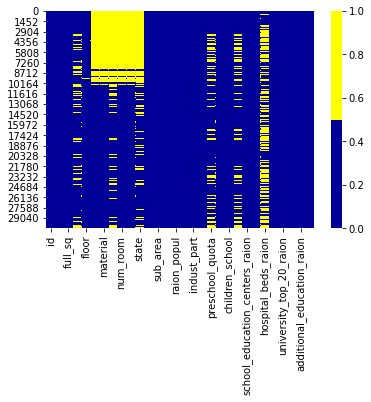

In [ ]:
colors = ['#000099','#ffff00']
sns.heatmap(data_frame[data_frame.columns[:30]].isnull(),cmap = sns.color_palette(colors))

 ## Процентный список

In [ ]:
for column in data_frame.columns:
  pct_missing = np.mean(data_frame[column].isnull())
  print('{} - {} %'.format(column,round(pct_missing*100)))

id - 0.0 %
timestamp - 0.0 %
full_sq - 0.0 %
life_sq - 21.0 %
floor - 1.0 %
max_floor - 31.0 %
material - 31.0 %
build_year - 45.0 %
num_room - 31.0 %
kitch_sq - 31.0 %
state - 44.0 %
product_type - 0.0 %
sub_area - 0.0 %
area_m - 0.0 %
raion_popul - 0.0 %
green_zone_part - 0.0 %
indust_part - 0.0 %
children_preschool - 0.0 %
preschool_quota - 22.0 %
preschool_education_centers_raion - 0.0 %
children_school - 0.0 %
school_quota - 22.0 %
school_education_centers_raion - 0.0 %
school_education_centers_top_20_raion - 0.0 %
hospital_beds_raion - 47.0 %
healthcare_centers_raion - 0.0 %
university_top_20_raion - 0.0 %
sport_objects_raion - 0.0 %
additional_education_raion - 0.0 %
culture_objects_top_25 - 0.0 %
culture_objects_top_25_raion - 0.0 %
shopping_centers_raion - 0.0 %
office_raion - 0.0 %
thermal_power_plant_raion - 0.0 %
incineration_raion - 0.0 %
oil_chemistry_raion - 0.0 %
radiation_raion - 0.0 %
railroad_terminal_raion - 0.0 %
big_market_raion - 0.0 %
nuclear_reactor_raion - 0.0

### Гистограмма пропущенных значений
Число пропусков в одной записи

In [ ]:
for column in data_frame.columns:
  missing = data_frame[column].isnull()
  if missing.any():
    print("column:", column)
    data_frame['{}_missing'.format(column)] = missing

column: life_sq
column: floor
column: max_floor
column: material
column: build_year
column: num_room
column: kitch_sq
column: state
column: preschool_quota
column: school_quota
column: hospital_beds_raion
column: raion_build_count_with_material_info
column: build_count_block
column: build_count_wood
column: build_count_frame
column: build_count_brick
column: build_count_monolith
column: build_count_panel
column: build_count_foam
column: build_count_slag
column: build_count_mix
column: raion_build_count_with_builddate_info
column: build_count_before_1920
column: build_count_1921-1945
column: build_count_1946-1970
column: build_count_1971-1995
column: build_count_after_1995
column: metro_min_walk
column: metro_km_walk
column: railroad_station_walk_km
column: railroad_station_walk_min
column: ID_railroad_station_walk
column: cafe_sum_500_min_price_avg
column: cafe_sum_500_max_price_avg
column: cafe_avg_price_500
column: cafe_sum_1000_min_price_avg
column: cafe_sum_1000_max_price_avg
colum

In [ ]:
missing_cols = [col for col in data_frame.columns if 'missing' in col]
data_frame['miss_number'] = data_frame[missing_cols].sum(axis = 1)
sorted_missing = data_frame['miss_number'].value_counts().reset_index().sort_values(by = 'index')

In [ ]:
print(sorted_missing)
print(len(missing_cols))

    index  miss_number
0       0         6042
1       1         3755
10      2          664
4       3         1850
6       4         1615
22      5          307
2       6         3652
3       7         2173
14      8          423
5       9         1716
9      10          721
19     11          356
7      12          758
15     13          385
38     14           43
26     15          187
21     16          308
41     17            3
35     18           83
11     19          616
34     20           90
18     21          359
8      22          739
30     23          120
28     24          153
16     25          382
31     26          108
37     27           52
20     28          333
23     29          196
36     30           76
13     31          447
24     32          193
39     33           30
17     34          367
12     35          477
29     36          132
27     37          166
25     38          188
40     39           16
32     40           96
33     41           92
42     43  

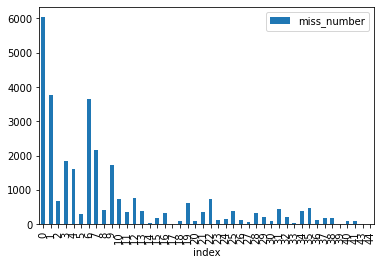

In [ ]:
sorted_missing.plot.bar(x = 'index',y = 'miss_number')

# Борьба с пропусками

## Отбрасывание записей

Метод удаления по списку - простое отбрасывание записей, содержащих пропуски. Это решение подходит только в том случае, если недостающие данные не являются информативными. Например, из гистограммы, построенной в предыдущем разделе, мы узнали, что лишь небольшое количество строк содержат более 35 пропусков. 

In [ ]:
ind_missing = data_frame[data_frame['miss_number'] > 35].index
data_frame_less_missings = data_frame.drop(ind_missing,axis= 0)
data_frame_less_missings

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,build_count_block_missing,build_count_wood_missing,build_count_frame_missing,build_count_brick_missing,build_count_monolith_missing,build_count_panel_missing,build_count_foam_missing,build_count_slag_missing,build_count_mix_missing,raion_build_count_with_builddate_info_missing,build_count_before_1920_missing,build_count_1921-1945_missing,build_count_1946-1970_missing,build_count_1971-1995_missing,build_count_after_1995_missing,metro_min_walk_missing,metro_km_walk_missing,railroad_station_walk_km_missing,railroad_station_walk_min_missing,ID_railroad_station_walk_missing,cafe_sum_500_min_price_avg_missing,cafe_sum_500_max_price_avg_missing,cafe_avg_price_500_missing,cafe_sum_1000_min_price_avg_missing,cafe_sum_1000_max_price_avg_missing,cafe_avg_price_1000_missing,cafe_sum_1500_min_price_avg_missing,cafe_sum_1500_max_price_avg_missing,cafe_avg_price_1500_missing,cafe_sum_2000_min_price_avg_missing,cafe_sum_2000_max_price_avg_missing,cafe_avg_price_2000_missing,cafe_sum_3000_min_price_avg_missing,cafe_sum_3000_max_price_avg_missing,cafe_avg_price_3000_missing,prom_part_5000_missing,cafe_sum_5000_min_price_avg_missing,cafe_sum_5000_max_price_avg_missing,cafe_avg_price_5000_missing,miss_number
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,9
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

## Отбрасывание признаков
Как и предыдущая техника, отбрасывание признаков может применяться только для неинформативных признаков.
В процентном списке, построенном ранее, мы увидели, что признак hospital_beds_raion имеет высокий процент недостающих значений – 47%

In [ ]:
cols_to_drop = ['hospital_beds_raion']
data_frame_less_beds_raion = data_frame.drop(cols_to_drop,axis=1)
'hospital_beds_raion' in data_frame_less_beds_raion.columns

False

# Внесение недостающих значений

*   Для непрерывных величин - на место пропуска можно записать среднее или медианное значение
*   Для категориальных признаков можно использовать в качестве заполнителя наиболее часто встречающееся значение.



In [ ]:
med = data_frame['life_sq'].median()
data_frame['life_sq'] = data_frame['life_sq'].fillna(med)

In [ ]:
numeric_cols = numeric_data.columns.values
for col in numeric_cols:
  missing = data_frame[col].isnull()
  num_missing = np.sum(missing)

  if num_missing > 0:
    data_frame['{}_missing'.format(col)] = missing
    median = data_frame[col].median()
    data_frame[col] = data_frame[col].fillna(med)


In [ ]:
data_frame

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,build_count_block_missing,build_count_wood_missing,build_count_frame_missing,build_count_brick_missing,build_count_monolith_missing,build_count_panel_missing,build_count_foam_missing,build_count_slag_missing,build_count_mix_missing,raion_build_count_with_builddate_info_missing,build_count_before_1920_missing,build_count_1921-1945_missing,build_count_1946-1970_missing,build_count_1971-1995_missing,build_count_after_1995_missing,metro_min_walk_missing,metro_km_walk_missing,railroad_station_walk_km_missing,railroad_station_walk_min_missing,ID_railroad_station_walk_missing,cafe_sum_500_min_price_avg_missing,cafe_sum_500_max_price_avg_missing,cafe_avg_price_500_missing,cafe_sum_1000_min_price_avg_missing,cafe_sum_1000_max_price_avg_missing,cafe_avg_price_1000_missing,cafe_sum_1500_min_price_avg_missing,cafe_sum_1500_max_price_avg_missing,cafe_avg_price_1500_missing,cafe_sum_2000_min_price_avg_missing,cafe_sum_2000_max_price_avg_missing,cafe_avg_price_2000_missing,cafe_sum_3000_min_price_avg_missing,cafe_sum_3000_max_price_avg_missing,cafe_avg_price_3000_missing,prom_part_5000_missing,cafe_sum_5000_min_price_avg_missing,cafe_sum_5000_max_price_avg_missing,cafe_avg_price_5000_missing,miss_number
0,1,2011-08-20,43,27.0,4.0,30.0,30.0,30.0,30.0,30.0,30.0,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,9
1,2,2011-08-23,34,19.0,3.0,30.0,30.0,30.0,30.0,30.0,30.0,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6
2,3,2011-08-27,43,29.0,2.0,30.0,30.0,30.0,30.0,30.0,30.0,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6
3,4,2011-09-01,89,50.0,9.0,30.0,30.0,30.0,30.0,30.0,30.0,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,30.0,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7
4,5,2011-09-05,77,77.0,4.0,30.0,30.0,30.0,30.0,30.0,30.0,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

# Нетипичные данные (выбросы)

Можно удалить записи или признаки с выбросами, либо скорректировать их, либо оставить без изменений.

## Гистограмма/коробчатая диаграмма

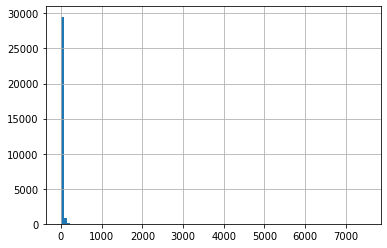

In [ ]:
data_frame['life_sq'].hist(bins = 100)

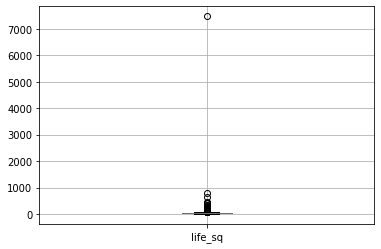

In [ ]:
data_frame.boxplot(column=['life_sq'])

## Описательная статистика

In [ ]:
data_frame['life_sq'].describe()

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

## Столбчатая диаграмма

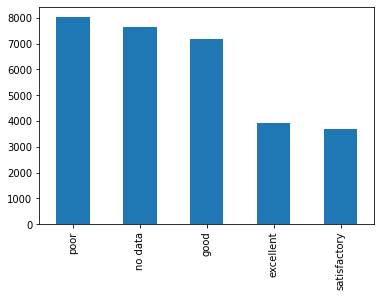

In [ ]:
data_frame['ecology'].value_counts().plot.bar()

# Неинформативные признаки

In [ ]:
num_rows = len(data_frame.index)
low_information_cols = []
for col in data_frame:
  cnts = data_frame[col].value_counts(dropna=False)
  top_pct = (cnts/num_rows).iloc[0]
  if top_pct > 0.95:
    low_information_cols.append(col)
    print('{0}: {1:.5f}%'.format(col, top_pct*100))
    print(cnts)
    print()

oil_chemistry_raion: 99.02858%
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.27187%
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.16780%
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

big_road1_1line: 97.43691%
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06934%
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.25641%
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.51101%
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.52689%
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosque_count_1000: 98.08342%
0    29887
1      584
Name: mosque_count_1000, dtype: int64

mosque_count_1500: 96.21936%
0    29